In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
%matplotlib inline

[Text(0.0, 0, 'Monday'),
 Text(0.2, 0, 'Tuesday'),
 Text(0.4, 0, 'Wednesday'),
 Text(0.6000000000000001, 0, 'Thursday'),
 Text(0.8, 0, 'Friday'),
 Text(1.0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

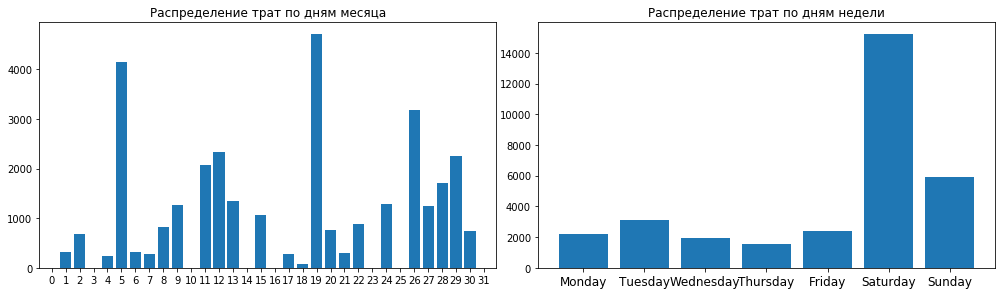

In [12]:
df = pd.read_excel(r'C:\Users\denis.gorev\Desktop\life\other\details.xlsx',encoding='cp1251')
df.drop(['Номер карты/счета/договора', 'Валюта счета', 'Валюта операции', 'Сумма пересчитанная в валюту счета', 'Дата обработки'], axis = 1, inplace = True)
df = df[df['Основание'] != 'Перевод на другую карту (Р2Р)']
df['Место траты'] = df['Основание'].str.split(' ').str[0]
df['День месяца'] = df['Дата операции'].dt.day
df['День недели'] = df['Дата операции'].dt.dayofweek
df = df[df['Сумма операции']<0]
#df.groupby('День месяца')['Сумма операции'].sum()
x1 = np.sort(df['День месяца'].unique())
x2 = np.sort(df['День недели'].unique())
day_of_month = df.groupby('День месяца')['Сумма операции'].sum()*(-1)
day_of_week = df.groupby('День недели')['Сумма операции'].sum()*(-1)

fig,axes = plt.subplots(figsize=(14,4), nrows = 1,ncols = 2)
plt.tight_layout()
axes[0].set_xticks(list(range(0,32)))
axes[0].bar(x1,day_of_month)
axes[0].set_title('Распределение трат по дням месяца')

axes[1].set_xticks(list(range(0,7)))
axes[1].bar(x2, day_of_week)
axes[1].set_title('Распределение трат по дням недели')
axes[1].set_xticklabels(list(calendar.day_name), fontsize=12)

#sns.barplot(x = x1, y = day_of_month)


In [117]:
df[df['День месяца']==5]

,Дата операции,Сумма операции,Основание,Статус,Место траты,День месяца,День недели
32,2019-10-05 22:28:00,-3354.0,IKEA DOM 4 CASH LINE,Исполнено,IKEA,5,5
33,2019-10-05 15:48:00,-465.5,PYATEROCHKA 198,Исполнено,PYATEROCHKA,5,5
34,2019-10-05 15:34:00,-70.0,KONDITERMAG,Исполнено,KONDITERMAG,5,5
35,2019-10-05 15:33:00,-248.0,KONDITERMAG,Исполнено,KONDITERMAG,5,5
36,2019-10-05 01:06:00,-56000.0,Перевод на другую карту (Р2Р),Исполнено,Перевод,5,5


[Text(0.0, 0, 'пн'),
 Text(0.2, 0, 'вт'),
 Text(0.4, 0, 'ср'),
 Text(0.6000000000000001, 0, 'чт'),
 Text(0.8, 0, 'пт'),
 Text(1.0, 0, 'cб'),
 Text(0, 0, 'вс')]

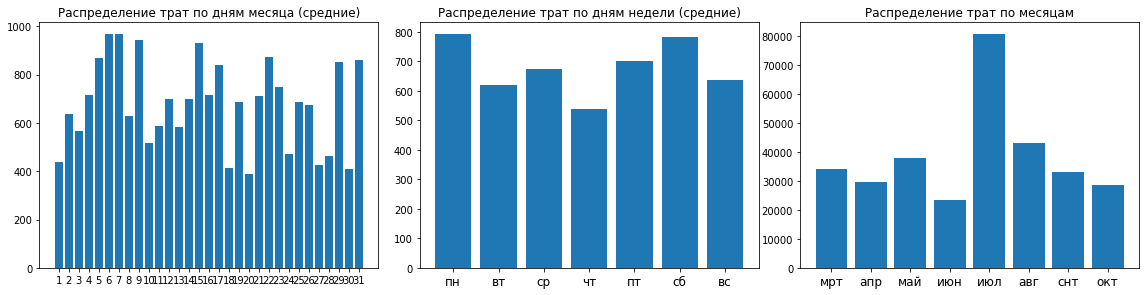

In [13]:
df = pd.read_excel(r'C:\Users\denis.gorev\Desktop\life\other\details_3.xlsx',encoding='cp1251')
df.drop(['Номер карты/счета/договора', 'Валюта счета', 'Валюта операции', 'Сумма пересчитанная в валюту счета', 'Дата обработки'], axis = 1, inplace = True)
df = df[df['Основание'] != 'Перевод на другую карту (Р2Р)']
#df['Место траты'] = df['Основание'].str.split(' ').str[0]
df['Месяцы'] = df['Дата операции'].dt.month
df['День месяца'] = df['Дата операции'].dt.day
df['День недели'] = df['Дата операции'].dt.dayofweek
df = df[df['Сумма операции']<0]
#df.groupby('День месяца')['Сумма операции'].sum()
x1 = np.sort(df['День месяца'].unique())
x2 = np.sort(df['День недели'].unique())
x3 = np.sort(df['Месяцы'].unique())
day_of_month = df.groupby('День месяца')['Сумма операции'].median()*(-1)
day_of_week = df.groupby('День недели')['Сумма операции'].median()*(-1)
month = df.groupby('Месяцы')['Сумма операции'].sum()*(-1)

fig,axes = plt.subplots(figsize=(16,4), nrows = 1,ncols = 3)
plt.tight_layout()

axes[2].set_xticks(list(range(3,11)))
axes[2].bar(x3,month)
axes[2].set_title('Распределение трат по месяцам')
axes[2].set_xticklabels(['мрт', 'апр', 'май', 'июн', 'июл', 'авг', 'снт', 'окт'], fontsize=12)

axes[0].set_xticks(list(range(1,32)))
axes[0].bar(x1,day_of_month)
axes[0].set_title('Распределение трат по дням месяца (средние)')

axes[1].set_xticks(list(range(0,7)))
axes[1].bar(x2, day_of_week)
axes[1].set_title('Распределение трат по дням недели (средние)')
axes[1].set_xticklabels([r'пн', 'вт', 'ср', 'чт', 'пт', 'cб', 'вс'], fontsize=12)

In [216]:
#df[df['День месяца'] == 31]['Сумма операции'].mean()
df[df['День месяца'] == 16]

,Дата операции,Сумма операции,Основание,Статус,Месяцы,День месяца,День недели
56,2019-09-16 21:11:12,-819.96,VKUSVILL 1559_1,Исполнено,9,16,0
90,2019-08-16 19:55:20,-716.67,BILLA PARKOVAYA,Исполнено,8,16,4
91,2019-08-16 18:50:44,-1233.00,DELIVERY-CLUB,Исполнено,8,16,4
127,2019-07-16 20:37:58,-784.00,VKUSVILL 1122_3,Исполнено,7,16,1
128,2019-07-16 17:44:29,-408.00,KAFE PRAYM PR.MIRA,Исполнено,7,16,1
129,2019-07-16 17:25:54,-18307.00,"""VF SERVISES""",Исполнено,7,16,1
168,2019-06-16 16:48:01,-691.74,VKUSVILL 1122_2,Исполнено,6,16,6
169,2019-06-16 00:00:02,-223.00,ORANGE,Исполнено,6,16,6
209,2019-05-16 21:56:03,-333.32,VKUSVILL 1122_1,Исполнено,5,16,3
259,2019-04-16 18:47:32,-409.15,STANEM DRUZYAMI,Исполнено,4,16,1
